# Chebyshev Polynomials

## Introduction

Chebyshev polynomials are a sequence of orthogonal polynomials that arise in approximation theory, numerical analysis, and spectral methods. Named after Pafnuty Chebyshev, these polynomials have remarkable properties that make them essential tools in computational mathematics.

## Definition

### Chebyshev Polynomials of the First Kind

The Chebyshev polynomials of the first kind, denoted $T_n(x)$, are defined on the interval $[-1, 1]$ by the trigonometric identity:

$$T_n(x) = \cos(n \arccos(x))$$

Equivalently, they satisfy the recurrence relation:

$$T_0(x) = 1$$
$$T_1(x) = x$$
$$T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x)$$

### Chebyshev Polynomials of the Second Kind

The Chebyshev polynomials of the second kind, denoted $U_n(x)$, are defined as:

$$U_n(x) = \frac{\sin((n+1) \arccos(x))}{\sin(\arccos(x))} = \frac{\sin((n+1)\theta)}{\sin(\theta)}$$

where $x = \cos(\theta)$. They satisfy the same recurrence relation but with:

$$U_0(x) = 1$$
$$U_1(x) = 2x$$
$$U_{n+1}(x) = 2x U_n(x) - U_{n-1}(x)$$

## Orthogonality

Chebyshev polynomials of the first kind are orthogonal with respect to the weight function $w(x) = \frac{1}{\sqrt{1-x^2}}$:

$$\int_{-1}^{1} \frac{T_m(x) T_n(x)}{\sqrt{1-x^2}} dx = \begin{cases} 0 & m \neq n \\ \pi & m = n = 0 \\ \frac{\pi}{2} & m = n \neq 0 \end{cases}$$

## Key Properties

1. **Minimax Property**: Among all monic polynomials of degree $n$, the scaled Chebyshev polynomial $\frac{T_n(x)}{2^{n-1}}$ has the smallest maximum absolute value on $[-1, 1]$.

2. **Zeros**: The zeros of $T_n(x)$ are called Chebyshev nodes:
   $$x_k = \cos\left(\frac{(2k-1)\pi}{2n}\right), \quad k = 1, 2, \ldots, n$$

3. **Extrema**: $T_n(x)$ attains its maximum value of $1$ and minimum value of $-1$ at:
   $$x_k = \cos\left(\frac{k\pi}{n}\right), \quad k = 0, 1, \ldots, n$$

## Applications

- **Polynomial interpolation**: Chebyshev nodes minimize Runge's phenomenon
- **Spectral methods**: Basis functions for solving differential equations
- **Filter design**: Chebyshev filters in signal processing
- **Numerical integration**: Clenshaw-Curtis quadrature

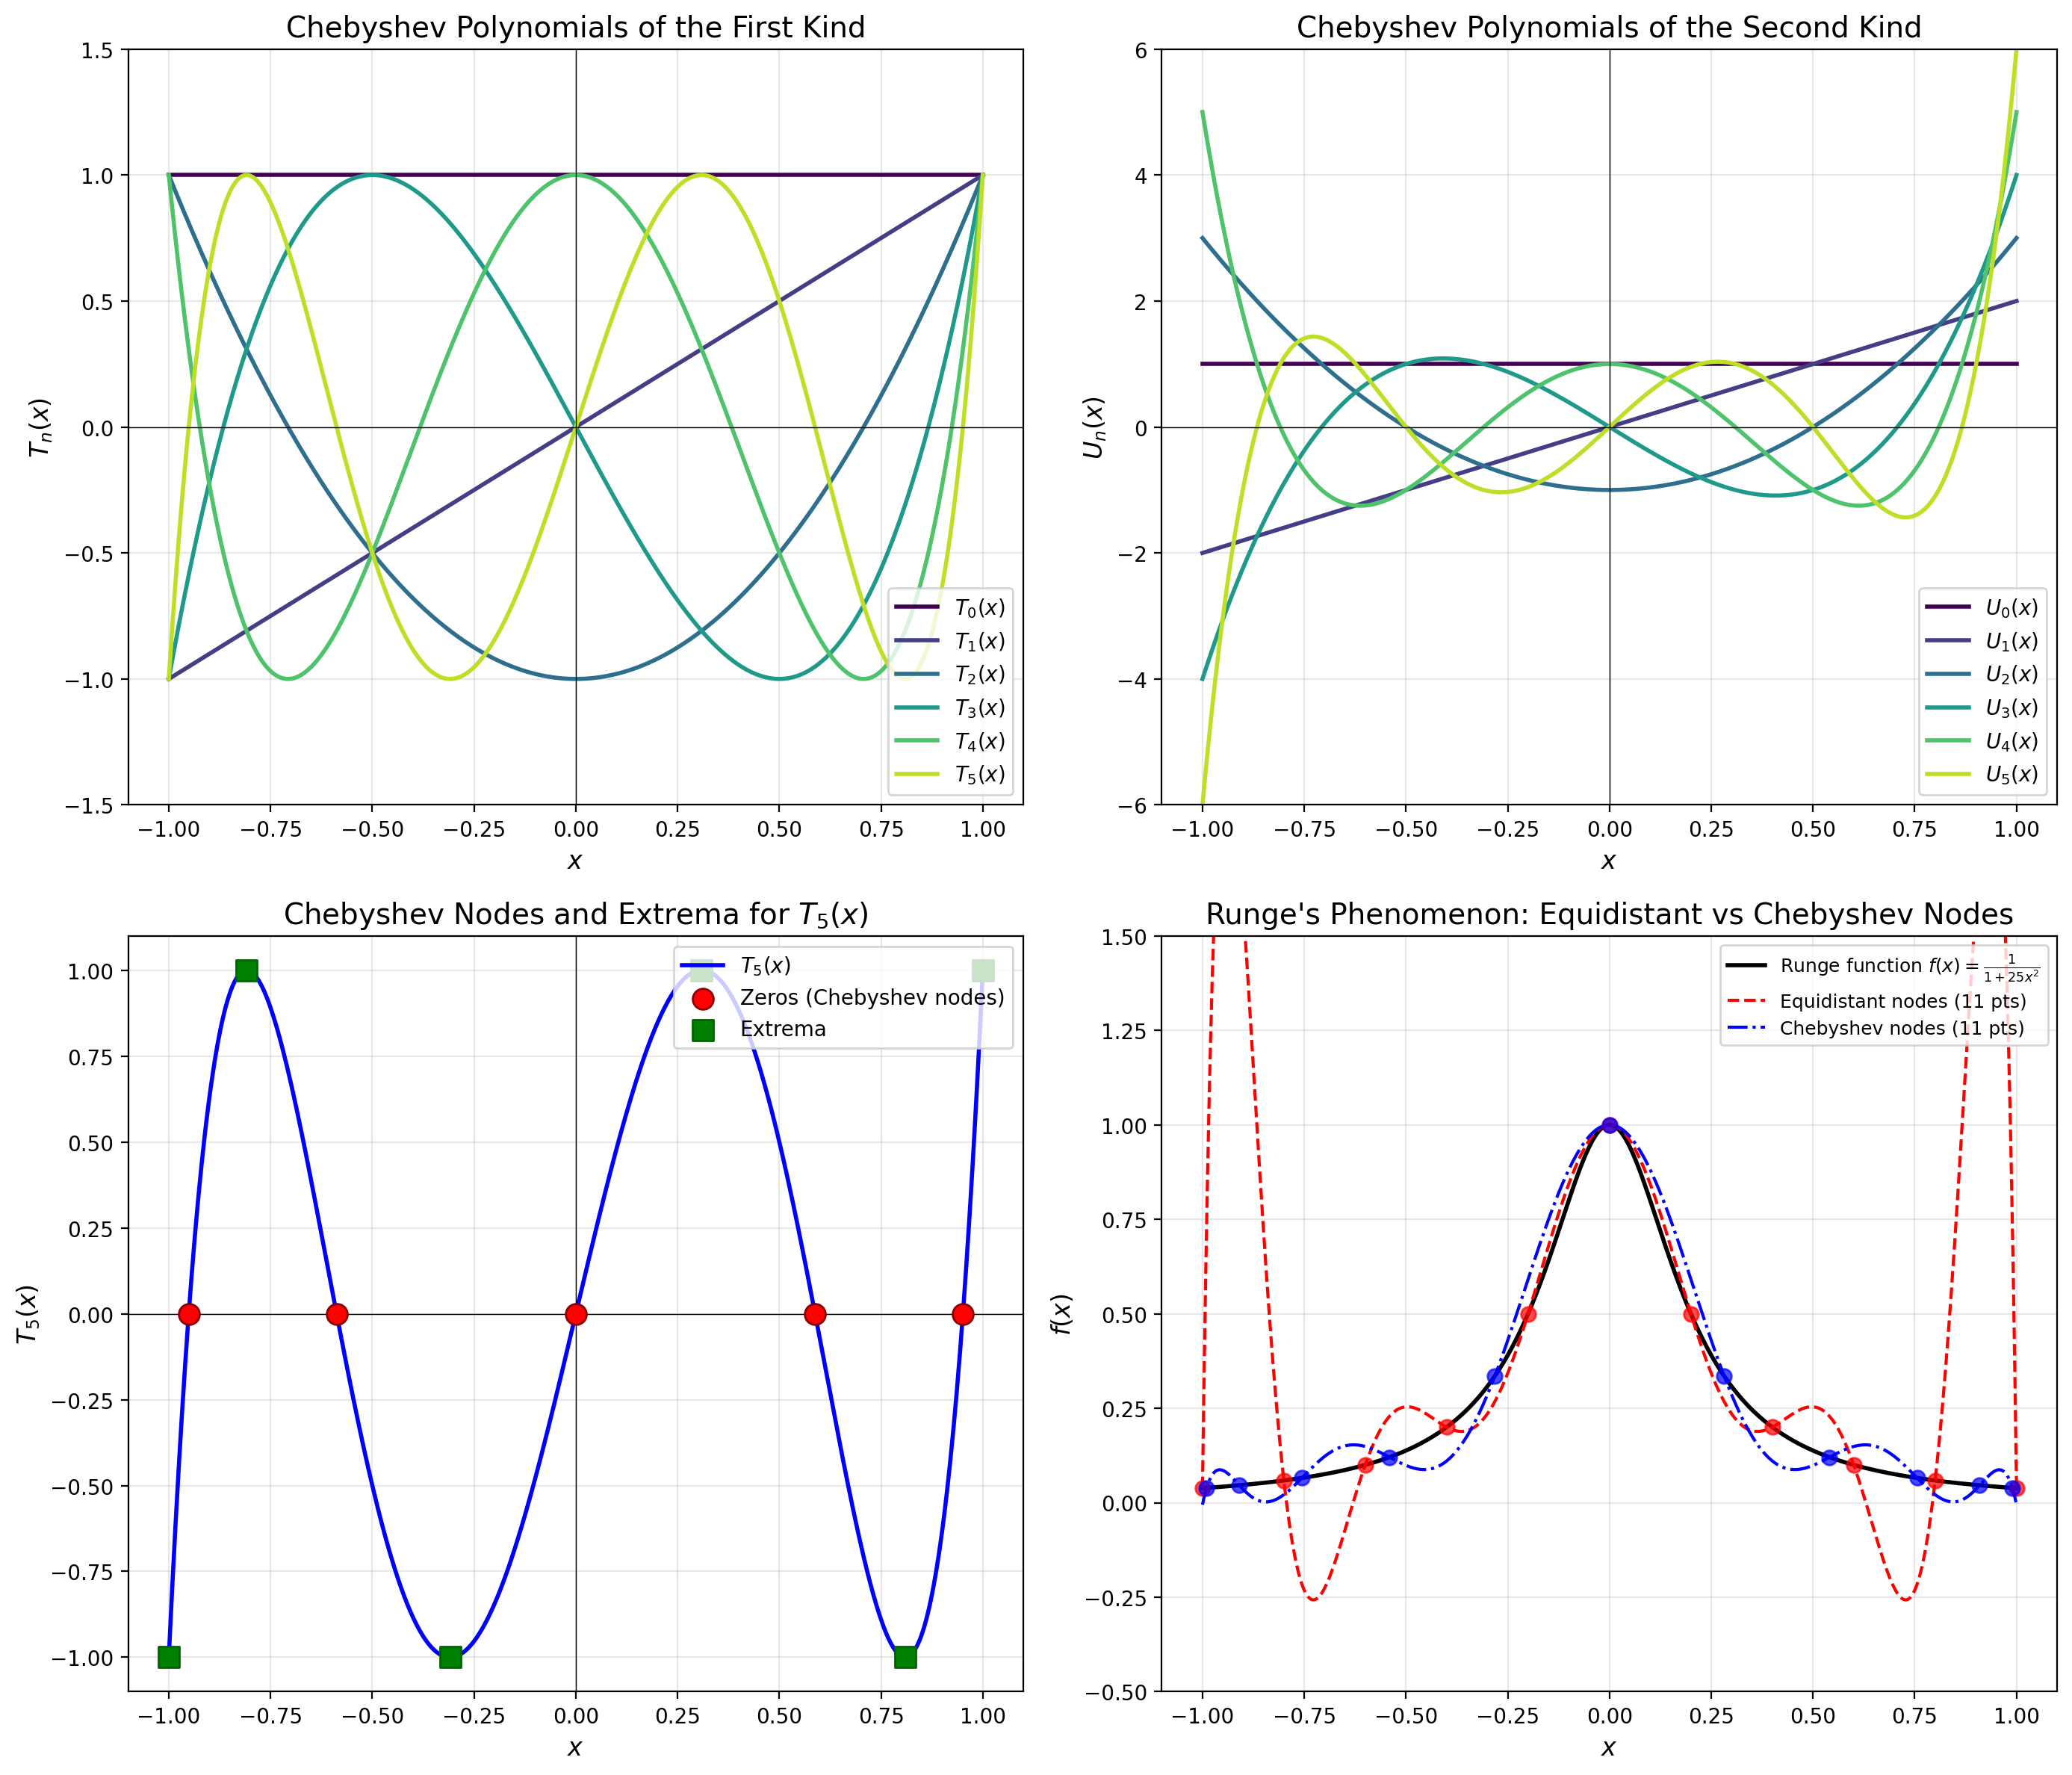

Plot saved to 'plot.png'


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_chebyt, eval_chebyu

# Set up the figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Define x range
x = np.linspace(-1, 1, 500)

# Plot 1: Chebyshev Polynomials of the First Kind
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0, 0.9, 6))
for n in range(6):
    T_n = eval_chebyt(n, x)
    ax1.plot(x, T_n, label=f'$T_{n}(x)$', color=colors[n], linewidth=2)

ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$T_n(x)$', fontsize=12)
ax1.set_title('Chebyshev Polynomials of the First Kind', fontsize=14)
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1.5, 1.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot 2: Chebyshev Polynomials of the Second Kind
ax2 = axes[0, 1]
for n in range(6):
    U_n = eval_chebyu(n, x)
    ax2.plot(x, U_n, label=f'$U_{n}(x)$', color=colors[n], linewidth=2)

ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$U_n(x)$', fontsize=12)
ax2.set_title('Chebyshev Polynomials of the Second Kind', fontsize=14)
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-6, 6)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

# Plot 3: Chebyshev Nodes and T_5(x)
ax3 = axes[1, 0]
n = 5
T_5 = eval_chebyt(n, x)
ax3.plot(x, T_5, 'b-', linewidth=2, label=f'$T_{n}(x)$')

# Calculate and plot zeros (Chebyshev nodes)
zeros = np.array([np.cos((2*k - 1) * np.pi / (2*n)) for k in range(1, n+1)])
ax3.scatter(zeros, np.zeros_like(zeros), color='red', s=100, zorder=5, 
            label='Zeros (Chebyshev nodes)', edgecolors='darkred')

# Calculate and plot extrema
extrema = np.array([np.cos(k * np.pi / n) for k in range(n+1)])
extrema_values = eval_chebyt(n, extrema)
ax3.scatter(extrema, extrema_values, color='green', s=100, zorder=5, 
            marker='s', label='Extrema', edgecolors='darkgreen')

ax3.set_xlabel('$x$', fontsize=12)
ax3.set_ylabel('$T_5(x)$', fontsize=12)
ax3.set_title('Chebyshev Nodes and Extrema for $T_5(x)$', fontsize=14)
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# Plot 4: Comparison of interpolation - Runge's phenomenon
ax4 = axes[1, 1]

# Runge's function
def runge(x):
    return 1 / (1 + 25 * x**2)

x_fine = np.linspace(-1, 1, 500)
y_runge = runge(x_fine)

# Equidistant nodes interpolation
n_interp = 11
x_equi = np.linspace(-1, 1, n_interp)
y_equi = runge(x_equi)

# Chebyshev nodes interpolation
x_cheb = np.array([np.cos((2*k - 1) * np.pi / (2*n_interp)) for k in range(1, n_interp+1)])
y_cheb = runge(x_cheb)

# Lagrange interpolation function
def lagrange_interp(x_nodes, y_nodes, x_eval):
    n = len(x_nodes)
    result = np.zeros_like(x_eval)
    for i in range(n):
        basis = np.ones_like(x_eval)
        for j in range(n):
            if i != j:
                basis *= (x_eval - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += y_nodes[i] * basis
    return result

y_interp_equi = lagrange_interp(x_equi, y_equi, x_fine)
y_interp_cheb = lagrange_interp(x_cheb, y_cheb, x_fine)

ax4.plot(x_fine, y_runge, 'k-', linewidth=2, label='Runge function $f(x) = \\frac{1}{1+25x^2}$')
ax4.plot(x_fine, y_interp_equi, 'r--', linewidth=1.5, label=f'Equidistant nodes ({n_interp} pts)')
ax4.plot(x_fine, y_interp_cheb, 'b-.', linewidth=1.5, label=f'Chebyshev nodes ({n_interp} pts)')
ax4.scatter(x_equi, y_equi, color='red', s=50, zorder=5, alpha=0.7)
ax4.scatter(x_cheb, y_cheb, color='blue', s=50, zorder=5, alpha=0.7)

ax4.set_xlabel('$x$', fontsize=12)
ax4.set_ylabel('$f(x)$', fontsize=12)
ax4.set_title("Runge's Phenomenon: Equidistant vs Chebyshev Nodes", fontsize=14)
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.savefig('chebyshev_polynomials_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Analysis of Results

The visualizations above demonstrate several key properties of Chebyshev polynomials:

### First and Second Kind (Top Row)

- **$T_n(x)$**: All polynomials are bounded by $[-1, 1]$, oscillating between these extremes exactly $n$ times
- **$U_n(x)$**: These polynomials have larger amplitude but share the same oscillatory character

### Chebyshev Nodes (Bottom Left)

The zeros of $T_5(x)$ (red circles) are clustered near the boundaries $x = \pm 1$. This non-uniform distribution is precisely what makes Chebyshev nodes optimal for polynomial interpolation.

### Runge's Phenomenon (Bottom Right)

This plot demonstrates the practical importance of Chebyshev polynomials:

- **Red dashed line**: Interpolation using equidistant nodes shows severe oscillations near $x = \pm 1$ (Runge's phenomenon)
- **Blue dash-dot line**: Interpolation using Chebyshev nodes provides a much better approximation throughout the interval

The clustering of Chebyshev nodes near the boundaries counteracts the tendency of polynomial interpolants to oscillate wildly at the edges.

In [2]:
# Numerical verification of orthogonality
from scipy.integrate import quad

def weight(x):
    """Weight function for Chebyshev polynomials of the first kind"""
    return 1 / np.sqrt(1 - x**2)

def integrand(x, m, n):
    """Integrand for orthogonality check"""
    return eval_chebyt(m, x) * eval_chebyt(n, x) * weight(x)

print("Orthogonality Verification for Chebyshev Polynomials of the First Kind")
print("=" * 65)
print(f"{'(m, n)':<12} {'Computed Integral':<20} {'Expected Value':<20}")
print("-" * 65)

# Test orthogonality for several pairs
test_pairs = [(0, 0), (1, 1), (2, 2), (3, 3), (0, 1), (1, 2), (2, 3), (0, 3)]

for m, n in test_pairs:
    result, error = quad(integrand, -1, 1, args=(m, n), limit=100)
    
    if m != n:
        expected = 0
    elif m == 0:
        expected = np.pi
    else:
        expected = np.pi / 2
    
    print(f"({m}, {n}){'':8} {result:<20.6f} {expected:<20.6f}")

print("\nThe computed integrals match the expected orthogonality relations.")

Orthogonality Verification for Chebyshev Polynomials of the First Kind
(m, n)       Computed Integral    Expected Value      
-----------------------------------------------------------------
(0, 0)         3.141593             3.141593            
(1, 1)         1.570796             1.570796            
(2, 2)         1.570796             1.570796            
(3, 3)         1.570796             1.570796            
(0, 1)         0.000000             0.000000            
(1, 2)         0.000000             0.000000            
(2, 3)         0.000000             0.000000            
(0, 3)         0.000000             0.000000            

The computed integrals match the expected orthogonality relations.


## Conclusion

Chebyshev polynomials are fundamental tools in numerical analysis due to their:

1. **Optimal approximation properties** - minimizing interpolation error
2. **Well-conditioned numerical behavior** - avoiding Runge's phenomenon
3. **Efficient computation** - via recurrence relations or FFT-based methods
4. **Orthogonality** - enabling spectral methods and series expansions

Their applications span from polynomial interpolation and numerical integration to spectral methods for differential equations and signal processing filter design.